In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import base64
from io import BytesIO

In [2]:
def rd(x,y=0):
    ''' A classical mathematical rounding by Voznica '''
    try:
        m = int('1'+'0'*y) # multiplier - how many positions to the right
        q = x*m # shift to the right by multiplier
        c = int(q) # new number
        i = int( (q-c)*10 ) # indicator number on the right
        if i >= 5:
            c += 1
        result = '{num:.{prec}f}'.format(num=c/m,prec=y)
    except:
        result = ''
    return result

In [3]:
# dodělat možnost na procenta do 100% a label na osu
def getBarChart(df, columns = '', type='h', title='Graf', rotation=45, precision=0, figsize=(5, 5), html=False, width=0.8):
    '''Tato funkce akceptuje df a nazvy sloupcu, vraci HTML kod horizontalniho grafu'''
    cols = []
    if columns != '':
        for i, column in enumerate(columns):
            #raise error if not found
            cols.append(df.columns.get_loc(column))
    else:
        for i, column in enumerate(df.columns):
            #raise error if not found
            cols.append(df.columns.get_loc(column))
    ind = np.arange(len(df.index))
    fig, ax = plt.subplots(figsize = figsize)
    rectss = []
    bottom=np.zeros(len(df.index))
    for i in range(len(cols)):
        rectss.append(plt.barh(ind, df[df.columns[cols[i]]], left = bottom, label = df.columns[cols[i]], height=width))
        bottom += np.array(df[df.columns[cols[i]]])
    bottom=np.zeros(len(df.index))
    for rects in rectss:
        bott = []
        for i, rect in enumerate(rects):
            if len(cols) == 1:
                ax.annotate(text = rd(rect.get_width(),precision), xy = (rect.get_width()+bottom[i], rect.get_y()+rect.get_height()/2), ha = 'left', va = 'center')
            else:
                ax.annotate(text = rd(rect.get_width(),precision), xy = (rect.get_width()/2+bottom[i], rect.get_y()+rect.get_height()/2), ha = 'center', va = 'center')
            bott.append(rect.get_width())
        bottom += np.array(bott)
    plt.yticks(ind, df.index, rotation = rotation)
    plt.title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(1.1, 1),
          ncol=1, fancybox=True, shadow=True)
    #plt.show()
    if html:
        buf = BytesIO()
        fig.savefig(buf, format="png", bbox_inches='tight')
        # Embed the result in the html output.
        data = base64.b64encode(buf.getbuffer()).decode("ascii")
        return f"<img src='data:image/png;base64,{data}'/>"

In [4]:
df = pd.DataFrame({'Boys': [67, 78],
                         'Girls': [72, 80], },
                        index=['First Year', 'Second Year'])
df

,Boys,Girls
First Year,67,72
Second Year,78,80


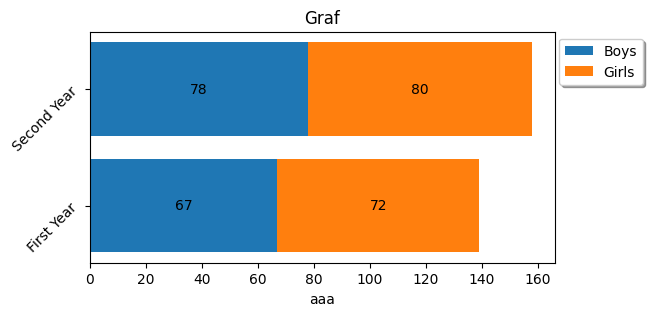

In [5]:
html = getBarChart(df, columns=['Boys', 'Girls'], figsize=(6,3), width=0.8, html=True)
plt.xlabel('aaa')
plt.show()

In [6]:
from ipywidgets import widgets, Layout, HBox, HTML
HTML(html)

HTML(value="<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAowAAAEpCAYAAAAZCnMWAAAAOnRFWHRTb2Z0d2FyZQ…

In [4]:
def getBarChartV(df, columns, title='Graf', rotation = 45, sort_values = True, sort_ascending = True, limit = 100, precision = 0):
    '''Tato funkce akceptuje df a nazvy sloupcu, vraci HTML kod vertikalniho grafu'''
    cols = []
    for i, column in enumerate(columns):
        #raise error if not found
        cols.append(df.columns.get_loc(column))
    if sort_values:
        df.sort_values(by=df.columns[cols[0]], axis = 0, inplace = True, ascending = sort_ascending)
    else:
        df.sort_index(inplace = True, ascending = sort_ascending)
    df = df.head(limit)
    ind = np.arange(len(df.index))
    width = 0.8/len(cols)
    fig, ax = plt.subplots(figsize = (10,5))
    rectss = []
    bottom=np.zeros(len(df.index))
    for i in range(len(cols)):
        rectss.append(plt.bar(ind, df[df.columns[cols[i]]], bottom = bottom, label = df.columns[cols[i]]))
        bottom += np.array(df[df.columns[cols[i]]])
    bottom=np.zeros(len(df.index))
    for rects in rectss:
        bott = []
        for i, rect in enumerate(rects):
            if len(cols) == 1:
                ax.annotate(s = rd(rect.get_height(),precision), xy = (rect.get_x() + rect.get_width()/2, rect.get_height() + bottom[i]), ha = 'center', va = 'bottom')
            else:
                ax.annotate(s = rd(rect.get_height(),precision), xy = (rect.get_x() + rect.get_width()/2, rect.get_height()/2 + bottom[i]), ha = 'center', va = 'center')
            bott.append(rect.get_height())
        bottom += np.array(bott)
    plt.xticks(ind, df.index, rotation = rotation)
    plt.title(title)
    ax.legend(loc='upper center', bbox_to_anchor=(1.1, 1),
          ncol=1, fancybox=True, shadow=True)
    #plt.show()
    buf = BytesIO()
    fig.savefig(buf, format="png", bbox_inches='tight')
    # Embed the result in the html output.
    data = base64.b64encode(buf.getbuffer()).decode("ascii")
    return f"<img src='data:image/png;base64,{data}'/>"